## Pose region

In [1]:
import cv2 as cv 
import numpy as np
import scipy
import PIL.Image
import math
import time
import matplotlib
%matplotlib inline
import pylab as plt
from generateLabelCPM import *
from modelCPM import *
import mxnet.gluon as gluon
import mxnet as mx
from bbox_transform import *

## Load symbol

In [2]:
def PoseModel_test():
   
    data = mx.symbol.Variable(name='data')
    conv1_1 = mx.symbol.Convolution(name='conv1_1', data=data , num_filter=64, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu1_1 = mx.symbol.Activation(name='relu1_1', data=conv1_1 , act_type='relu')
    conv1_2 = mx.symbol.Convolution(name='conv1_2', data=relu1_1 , num_filter=64, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu1_2 = mx.symbol.Activation(name='relu1_2', data=conv1_2 , act_type='relu')
    pool1_stage1 = mx.symbol.Pooling(name='pool1_stage1', data=relu1_2 , pooling_convention='full', pad=(0,0), kernel=(2,2), stride=(2,2), pool_type='max')
    conv2_1 = mx.symbol.Convolution(name='conv2_1', data=pool1_stage1 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu2_1 = mx.symbol.Activation(name='relu2_1', data=conv2_1 , act_type='relu')
    conv2_2 = mx.symbol.Convolution(name='conv2_2', data=relu2_1 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu2_2 = mx.symbol.Activation(name='relu2_2', data=conv2_2 , act_type='relu')
    pool2_stage1 = mx.symbol.Pooling(name='pool2_stage1', data=relu2_2 , pooling_convention='full', pad=(0,0), kernel=(2,2), stride=(2,2), pool_type='max')
    conv3_1 = mx.symbol.Convolution(name='conv3_1', data=pool2_stage1 , num_filter=256, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu3_1 = mx.symbol.Activation(name='relu3_1', data=conv3_1 , act_type='relu')
    conv3_2 = mx.symbol.Convolution(name='conv3_2', data=relu3_1 , num_filter=256, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu3_2 = mx.symbol.Activation(name='relu3_2', data=conv3_2 , act_type='relu')
    conv3_3 = mx.symbol.Convolution(name='conv3_3', data=relu3_2 , num_filter=256, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu3_3 = mx.symbol.Activation(name='relu3_3', data=conv3_3 , act_type='relu')
    conv3_4 = mx.symbol.Convolution(name='conv3_4', data=relu3_3 , num_filter=256, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu3_4 = mx.symbol.Activation(name='relu3_4', data=conv3_4 , act_type='relu')
    pool3_stage1 = mx.symbol.Pooling(name='pool3_stage1', data=relu3_4 , pooling_convention='full', pad=(0,0), kernel=(2,2), stride=(2,2), pool_type='max')
    conv4_1 = mx.symbol.Convolution(name='conv4_1', data=pool3_stage1 , num_filter=512, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu4_1 = mx.symbol.Activation(name='relu4_1', data=conv4_1 , act_type='relu')
    conv4_2 = mx.symbol.Convolution(name='conv4_2', data=relu4_1 , num_filter=512, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu4_2 = mx.symbol.Activation(name='relu4_2', data=conv4_2 , act_type='relu')
    conv4_3_CPM = mx.symbol.Convolution(name='conv4_3_CPM', data=relu4_2 , num_filter=256, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu4_3_CPM = mx.symbol.Activation(name='relu4_3_CPM', data=conv4_3_CPM , act_type='relu')
    conv4_4_CPM = mx.symbol.Convolution(name='conv4_4_CPM', data=relu4_3_CPM , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu4_4_CPM = mx.symbol.Activation(name='relu4_4_CPM', data=conv4_4_CPM , act_type='relu')
    
    conv5_1_CPM_L1 = mx.symbol.Convolution(name='conv5_1_CPM_L1', data=relu4_4_CPM , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_1_CPM_L1 = mx.symbol.Activation(name='relu5_1_CPM_L1', data=conv5_1_CPM_L1 , act_type='relu')
    conv5_1_CPM_L2 = mx.symbol.Convolution(name='conv5_1_CPM_L2', data=relu4_4_CPM , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_1_CPM_L2 = mx.symbol.Activation(name='relu5_1_CPM_L2', data=conv5_1_CPM_L2 , act_type='relu')
    conv5_2_CPM_L1 = mx.symbol.Convolution(name='conv5_2_CPM_L1', data=relu5_1_CPM_L1 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_2_CPM_L1 = mx.symbol.Activation(name='relu5_2_CPM_L1', data=conv5_2_CPM_L1 , act_type='relu')
    conv5_2_CPM_L2 = mx.symbol.Convolution(name='conv5_2_CPM_L2', data=relu5_1_CPM_L2 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_2_CPM_L2 = mx.symbol.Activation(name='relu5_2_CPM_L2', data=conv5_2_CPM_L2 , act_type='relu')
    conv5_3_CPM_L1 = mx.symbol.Convolution(name='conv5_3_CPM_L1', data=relu5_2_CPM_L1 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_3_CPM_L1 = mx.symbol.Activation(name='relu5_3_CPM_L1', data=conv5_3_CPM_L1 , act_type='relu')
    conv5_3_CPM_L2 = mx.symbol.Convolution(name='conv5_3_CPM_L2', data=relu5_2_CPM_L2 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_3_CPM_L2 = mx.symbol.Activation(name='relu5_3_CPM_L2', data=conv5_3_CPM_L2 , act_type='relu')
    conv5_4_CPM_L1 = mx.symbol.Convolution(name='conv5_4_CPM_L1', data=relu5_3_CPM_L1 , num_filter=512, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    relu5_4_CPM_L1 = mx.symbol.Activation(name='relu5_4_CPM_L1', data=conv5_4_CPM_L1 , act_type='relu')
    conv5_4_CPM_L2 = mx.symbol.Convolution(name='conv5_4_CPM_L2', data=relu5_3_CPM_L2 , num_filter=512, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    relu5_4_CPM_L2 = mx.symbol.Activation(name='relu5_4_CPM_L2', data=conv5_4_CPM_L2 , act_type='relu')
    conv5_5_CPM_L1 = mx.symbol.Convolution(name='conv5_5_CPM_L1', data=relu5_4_CPM_L1 , num_filter=38, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    conv5_5_CPM_L2 = mx.symbol.Convolution(name='conv5_5_CPM_L2', data=relu5_4_CPM_L2 , num_filter=19, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    
    conv5_1_CPM_Loc = mx.symbol.Convolution(name='conv5_1_CPM_Loc', data=relu4_4_CPM , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_1_CPM_Loc = mx.symbol.Activation(name='relu5_1_CPM_Loc', data=conv5_1_CPM_Loc, act_type='relu')
    conv5_2_CPM_Loc = mx.symbol.Convolution(name='conv5_2_CPM_Loc', data=relu5_1_CPM_Loc, num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_2_CPM_Loc = mx.symbol.Activation(name='relu5_2_CPM_Loc', data=conv5_2_CPM_Loc, act_type='relu')
    conv5_3_CPM_Loc = mx.symbol.Convolution(name='conv5_3_CPM_Loc', data=relu5_2_CPM_Loc, num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_3_CPM_Loc = mx.symbol.Activation(name='relu5_3_CPM_Loc', data=conv5_3_CPM_Loc, act_type='relu')
    conv5_4_CPM_Loc = mx.symbol.Convolution(name='conv5_4_CPM_Loc', data=relu5_3_CPM_Loc, num_filter=512, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    relu5_4_CPM_Loc = mx.symbol.Activation(name='relu5_4_CPM_Loc', data=conv5_4_CPM_Loc, act_type='relu')
    conv5_5_CPM_Loc = mx.symbol.Convolution(name='conv5_5_CPM_Loc', data=relu5_4_CPM_Loc, num_filter=4, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    
    # loclabel, locweight
    
    group = mx.symbol.Group([conv5_5_CPM_L1, conv5_5_CPM_L2, conv5_5_CPM_Loc])
    return group

## Load parameters

In [3]:
## Load symbol and parameters, the parameters can be downloaded from the following link. 
## including the realtimePose-symbol.json and realtimePose-0000.params
## https://drive.google.com/drive/folders/0BzffphMuhDDMV0RZVGhtQWlmS1U?usp=sharing
output_prefix='outputModel'
sym, arg_params, aux_params = mx.model.load_checkpoint(output_prefix, 40)

In [4]:
# vgg

In [5]:
# test_image = 'sample_image/multiperson.jpg'
# oriImg = cv.imread(test_image) # B,G,R order
# f = plt.imshow(oriImg[:,:,[2,1,0]]) # reorder it before displaying
with open('pose_io/data.json', 'r') as f:
    datas = json.load(f)
keyss = datas.keys()

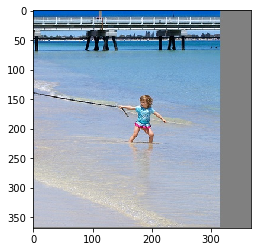

In [19]:
dirpath = 'traindata/'
oriImg = cv.imread(dirpath + str(keyss[58]) + '_image.jpg')
plt.imshow(oriImg[:,:, [2,1, 0]])

In [20]:
def padRightDownCorner(img, stride, padValue):
    h = img.shape[0]
    w = img.shape[1]

    pad = 4 * [None]
    pad[0] = 0 # up
    pad[1] = 0 # left
    pad[2] = 0 if (h%stride==0) else stride - (h % stride) # down
    pad[3] = 0 if (w%stride==0) else stride - (w % stride) # right

    img_padded = img
    pad_up = np.tile(img_padded[0:1,:,:]*0 + padValue, (pad[0], 1, 1))
    img_padded = np.concatenate((pad_up, img_padded), axis=0)
    pad_left = np.tile(img_padded[:,0:1,:]*0 + padValue, (1, pad[1], 1))
    img_padded = np.concatenate((pad_left, img_padded), axis=1)
    pad_down = np.tile(img_padded[-2:-1,:,:]*0 + padValue, (pad[2], 1, 1))
    img_padded = np.concatenate((img_padded, pad_down), axis=0)
    pad_right = np.tile(img_padded[:,-2:-1,:]*0 + padValue, (1, pad[3], 1))
    img_padded = np.concatenate((img_padded, pad_right), axis=1)

    return img_padded, pad

class DataBatch(object):
    def __init__(self, data, label, pad=0):
        self.data = [data]
        self.label = [label]
        self.pad = pad

In [21]:
oriImg.shape

(368, 368, 3)

In [22]:
imageToTest_padded, pad = padRightDownCorner(oriImg, 8, 128)
imageToTest_padded = cv.resize(imageToTest_padded, (368,368), interpolation=cv.INTER_CUBIC)

In [23]:
print type(imageToTest_padded), imageToTest_padded.shape

<type 'numpy.ndarray'> (368, 368, 3)


In [24]:
import mxnet as mx
from mxnet import nd
from mxnet.contrib.ndarray import MultiBoxPrior

transposeImage = np.transpose(np.float32(imageToTest_padded[:,:,:]), (2,0,1))/256 - 0.5
testimage = transposeImage

In [25]:
class DataBatch(object):
    def __init__(self, data, label, pad=0):
        self.data = [data]
        self.label = [label]
        self.pad = pad

In [26]:
posesym = PoseModel_test()

In [27]:
cmodel = mx.mod.Module(symbol=posesym, label_names=[])
cmodel.bind(data_shapes=[('data', (1,3,
                                   testimage.shape[1],testimage.shape[2]))])
cmodel.init_params(arg_params=arg_params, aux_params=aux_params)
onedata = DataBatch(mx.nd.array([testimage[:,:,:]]), 0)
    
cmodel.forward(onedata)
result=cmodel.get_outputs()
heatmap = np.moveaxis(result[1].asnumpy()[0], 0, -1)
heatmap = cv.resize(heatmap, (0,0), fx=8, fy=8, interpolation=cv.INTER_CUBIC)
heatmap = heatmap[:imageToTest_padded.shape[0]-pad[2], :imageToTest_padded.shape[1]-pad[3], :]
heatmap = cv.resize(heatmap, (oriImg.shape[1], oriImg.shape[0]), interpolation=cv.INTER_CUBIC)


In [28]:
heatmap.shape

(368, 368, 19)

In [29]:
# part_str = [nose, neck, Rsho, Relb, Rwri, Lsho, Lelb, Lwri, Rhip, Rkne, Rank, Lhip, Lkne, 
#             Lank, Leye, Reye, Lear, Rear, pt19]

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


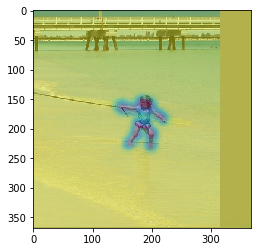

In [30]:
heatmap_avg = heatmap
f = plt.figure()
plt.imshow(oriImg[:,:,[2,1,0]])
ax2 = plt.imshow(heatmap_avg[:,:,18], alpha=.5)
f.show()

In [31]:
paf = np.moveaxis(result[0].asnumpy()[0], 0, -1)
paf = cv.resize(paf, (0,0), fx=8, fy=8, interpolation=cv.INTER_CUBIC)
paf = paf[:imageToTest_padded.shape[0]-pad[2], :imageToTest_padded.shape[1]-pad[3], :]
paf = cv.resize(paf, (oriImg.shape[1], oriImg.shape[0]), interpolation=cv.INTER_CUBIC)

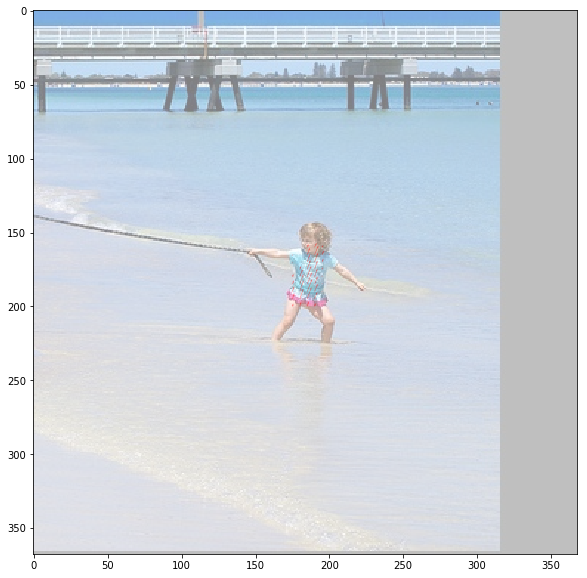

In [32]:
paf_avg = paf
from numpy import ma
U = paf_avg[:,:,0] * -1
V = paf_avg[:,:,1]
X, Y = np.meshgrid(np.arange(U.shape[1]), np.arange(U.shape[0]))
M = np.zeros(U.shape, dtype='bool')
M[U**2 + V**2 < 0.1 * 0.1] = True
U = ma.masked_array(U, mask=M)
V = ma.masked_array(V, mask=M)

# 1
plt.figure()
plt.imshow(oriImg[:,:,[2,1,0]], alpha = .5)
s = 5
Q = plt.quiver(X[::s,::s], Y[::s,::s], U[::s,::s], V[::s,::s], 
               scale=50, headaxislength=4, alpha=.5, width=0.001, color='r')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)

In [33]:
for i in range(46):
    for j in range(46):
        if heatmap[i,j, 0] == heatmap[:, :, 0].max():
            print i, j

In [34]:
heatmap_avg.shape

(368, 368, 19)

In [35]:
param={}
param['octave'] = 3
param['use_gpu'] = 1
param['starting_range'] = 0.8
param['ending_range'] = 2
param['scale_search'] = [0.5, 1, 1.5, 2]
param['thre1'] = 0.1
param['thre2'] = 0.06
param['thre3'] = 0.4
param['mid_num'] = 4
param['min_num'] = 10
param['crop_ratio'] = 2.5
param['bbox_ratio'] = 0.25
param['GPUdeviceNumber'] = 3

import scipy


#plt.imshow(heatmap_avg[:,:,2])
from scipy.ndimage.filters import gaussian_filter
all_peaks = []
peak_counter = 0

for part in range(19-1):
    x_list = []
    y_list = []
    map_ori = heatmap_avg[:,:,part]
    mapn = gaussian_filter(map_ori, sigma=3)
    #mapn = map_ori
    map_left = np.zeros(mapn.shape)
    map_left[1:,:] = mapn[:-1,:]
    map_right = np.zeros(mapn.shape)
    map_right[:-1,:] = mapn[1:,:]
    map_up = np.zeros(mapn.shape)
    map_up[:,1:] = mapn[:,:-1]
    map_down = np.zeros(mapn.shape)
    map_down[:,:-1] = mapn[:,1:]
    
    peaks_binary = np.logical_and.reduce((mapn>=map_left, mapn>=map_right, mapn>=map_up,
                                          mapn>=map_down, mapn > param['thre1']))
    peaks = zip(np.nonzero(peaks_binary)[1], np.nonzero(peaks_binary)[0]) # note reverse
    peaks_with_score = [x + (map_ori[x[1],x[0]],) for x in peaks]
    id = range(peak_counter, peak_counter + len(peaks))
    peaks_with_score_and_id = [peaks_with_score[i] + (id[i],) for i in range(len(id))]

    all_peaks.append(peaks_with_score_and_id)
    peak_counter += len(peaks)

In [37]:
all_peaks

[[(184, 158, 0.95073062, 0)],
 [(188, 167, 0.83838475, 1)],
 [(178, 165, 0.97186631, 2)],
 [(164, 165, 0.59798837, 3)],
 [(152, 165, 0.72115457, 4)],
 [(197, 167, 0.87888348, 5)],
 [(209, 175, 0.61692804, 6)],
 [(147, 163, 0.20068637, 7), (218, 182, 0.76471561, 8)],
 [(179, 192, 1.0469818, 9)],
 [(173, 209, 0.87906724, 10)],
 [(165, 222, 0.60455287, 11)],
 [(191, 193, 0.82497376, 12)],
 [(199, 209, 0.97197175, 13)],
 [(198, 226, 0.74280888, 14), (158, 227, 0.33103517, 15)],
 [(183, 156, 0.87883753, 16)],
 [(187, 156, 1.0384219, 17)],
 [(184, 158, 0.24289982, 18)],
 [(194, 157, 0.9879033, 19)]]

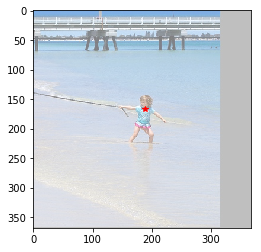

In [40]:
plt.imshow(oriImg[:,:,[2,1,0]], alpha = .5)
plt.plot(188, 167, 'r*')

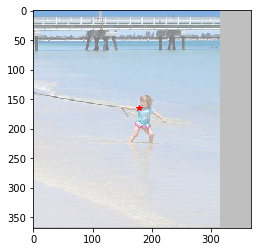

In [41]:
plt.imshow(oriImg[:,:,[2,1,0]], alpha = .5)
plt.plot(178, 165, 'r*')

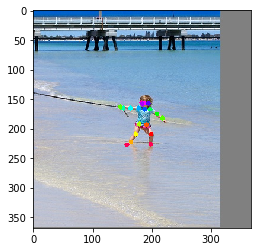

In [42]:
# visualize
colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]

cmap = matplotlib.cm.get_cmap('hsv')

canvas = oriImg # B,G,R order

for i in range(18):
    rgba = np.array(cmap(1 - i/18. - 1./36))
    rgba[0:3] *= 255
    for j in range(len(all_peaks[i])):
        cv.circle(canvas, all_peaks[i][j][0:2], 4, colors[i], thickness=-1)

to_plot = cv.addWeighted(oriImg, 0.3, canvas, 0.7, 0)
plt.imshow(to_plot[:,:,[2,1,0]])
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(11, 11)

In [43]:
from generate_anchor import *

allowed_border=0
feat_stride=8
feat_shape = [46, 46]

base_anchors = generate_anchors(base_size=feat_stride, ratios=[1], scales=2 ** np.arange(3, 4))
num_anchors = base_anchors.shape[0]
feat_height, feat_width = feat_shape[-2:]


# 1. generate proposals from bbox deltas and shifted anchors
shift_x = np.arange(0, feat_width) * feat_stride
shift_y = np.arange(0, feat_height) * feat_stride
shift_x, shift_y = np.meshgrid(shift_x, shift_y)
shifts = np.vstack((shift_x.ravel(), shift_y.ravel(), shift_x.ravel(), shift_y.ravel())).transpose()
shifts

# add A anchors (1, A, 4) to
# cell K shifts (K, 1, 4) to get
# shift anchors (K, A, 4)
# reshape to (K*A, 4) shifted anchors
A = num_anchors
K = shifts.shape[0]
all_anchors = base_anchors.reshape((1, A, 4)) + shifts.reshape((1, K, 4)).transpose((1, 0, 2))
all_anchors = all_anchors.reshape((K * A, 4))
total_anchors = int(K * A)

In [44]:
all_anchors

array([[ -28.,  -28.,   35.,   35.],
       [ -20.,  -28.,   43.,   35.],
       [ -12.,  -28.,   51.,   35.],
       ..., 
       [ 316.,  332.,  379.,  395.],
       [ 324.,  332.,  387.,  395.],
       [ 332.,  332.,  395.,  395.]])

In [45]:
loc = result[2]

In [46]:
loc.shape

(1L, 4L, 46L, 46L)

In [47]:
originalboxes = np.transpose(loc, [0, 2, 3, 1])
originalboxes.shape

(1L, 46L, 46L, 4L)

In [48]:
boxdelta = originalboxes.reshape((-1, 4))
boxdelta.shape

(2116L, 4L)

In [49]:
newboxes = all_anchors.reshape((-1, 4))
newboxes.shape

(2116, 4)

In [50]:
type(boxdelta), type(newboxes)

(mxnet.ndarray.ndarray.NDArray, numpy.ndarray)

In [51]:
predictboxes = bbox_pred(newboxes, boxdelta.asnumpy())
print predictboxes.shape

(2116, 4)


In [52]:
k = predictboxes.reshape(46,46,4)

In [53]:
k.shape

(46, 46, 4)

In [54]:
newk = k[:, :, :]
newk.shape

(46, 46, 4)

In [55]:
y = 165/8
x = 178/8
# 182, 148

In [56]:
(x,y)

(22, 20)

In [57]:
newk[y,x, :]

array([ 142.14551401,  146.28339958,  226.28284311,  242.9425869 ])

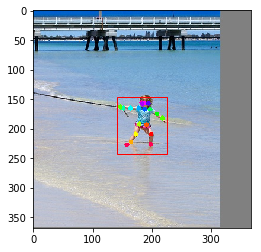

In [58]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(oriImg[:, :, [2, 1, 0]])

# Create a Rectangle patch
rect = patches.Rectangle(
    (newk[y, x, 0], newk[y, x, 1]), newk[y, x, 2]-newk[y, x, 0], newk[y, x, 3]-newk[y, x, 1],
    linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [59]:
y = 167/8
x = 188/8
# 182, 148


In [60]:
(x,y)

(23, 20)

In [61]:
newk[y,x, :]

array([ 140.83629942,  146.36436844,  225.6880374 ,  243.13526535])

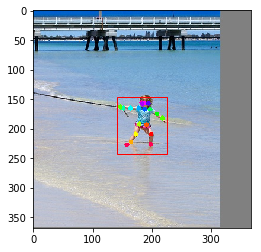

In [62]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(oriImg[:, :, [2, 1, 0]])

# Create a Rectangle patch
rect = patches.Rectangle(
    (newk[y, x, 0], newk[y, x, 1]), newk[y, x, 2]-newk[y, x, 0], newk[y, x, 3]-newk[y, x, 1],
    linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

[ 137.16565323  141.62150764  226.34811783  240.24813271]


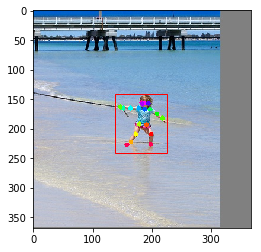

In [65]:
y = 165/8
x = 209/8
# 182, 148

# (x,y)
print newk[y,x, :]

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(oriImg[:, :, [2, 1, 0]])

# Create a Rectangle patch
rect = patches.Rectangle(
    (newk[y, x, 0], newk[y, x, 1]), newk[y, x, 2]-newk[y, x, 0], newk[y, x, 3]-newk[y, x, 1],
    linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

[ 140.48803139  143.61658478  222.8117466   243.16390228]


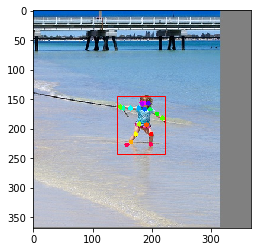

In [66]:
y = 154/8
x = 174/8
# 182, 148
newk[y,x, :]
print newk[y,x, :]

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(oriImg[:, :, [2, 1, 0]])

# Create a Rectangle patch
rect = patches.Rectangle(
    (newk[y, x, 0], newk[y, x, 1]), newk[y, x, 2]-newk[y, x, 0], newk[y, x, 3]-newk[y, x, 1],
    linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [53]:
### training error

In [ ]:
335.902165636 332.639678531 324.574368876